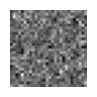

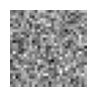

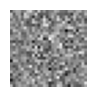

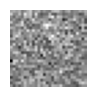

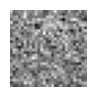

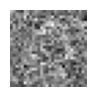

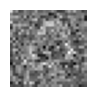

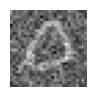

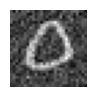

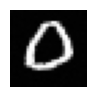

In [11]:
import torch
from Unet import Unet  # 确保导入了模型定义
import matplotlib.pyplot as plt
def show(image):
    plt.figure(figsize=(1,1))
    plt.imshow(image.squeeze().cpu().detach(), cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    net = Unet(in_channels=1, model_channels=96, out_channels=1, channel_mult=(1, 2, 2), attention_resolutions=[]).to('cuda')
    net.load_state_dict(torch.load('./model/ddpm_weights.pth', map_location='cuda'))  # 加载权重
    net.eval()  # 切换到评估模式

    T = 1000
    device = 'cuda'
    beta = torch.linspace(0.0001, 0.02, T).to(device=device)
    alpha = 1-beta
    alpha_bar = torch.cumprod(alpha, dim=0).to(device=device)
    x = torch.randn(1, 1, 28, 28).to('cuda')
    timesteps = torch.tensor([T-1]).to('cuda')  # 选择最后一个时间步
    with torch.no_grad():
        for t in range(T-1,-1,-1):
            t_tensor = torch.tensor([t]).to(device)
            pre_noise = net(x,t_tensor)

            mean = (1 / alpha[t_tensor].sqrt()) * (x - (1 - alpha[t_tensor]) / (1 - alpha_bar[t_tensor]).sqrt() * pre_noise)
            variance = beta[t_tensor].sqrt()
            noise = torch.randn_like(x).to(device)
            if t_tensor > 0:
                noise = torch.randn_like(x).to(device)
                x = mean + variance * noise
            else:
                x = mean
            if t % 100 == 0:
                show(x)